# Project 2

### Scientific Question: Can we predict the most likely flu strain in the following year? 

To prepare for the upcoming year's flu season, scientists will need to begin preparing for a flu vaccine as soon as they can. Research has shown that by comparing the genetic distances of hemagglutinin, an influenza surface protein, vaccines can be made based on this data and have quantified effectiveness for various influenza types (Cao et al., 2021). Hemagluttin has already been determined as a strong varaint predictor for influenza. As according to Lee & Chen, 2004, five antigenic sites in the hemagglutinin surface protein have been identified as the best for predicting antigenic variants in influenza H1N1, which is a predominant human influenza virus. 

The WHO, World Health Organization uses this method to predict next year's flu strain based on genetic distance scores amongst current strains around the world, and due to genetic drift the strain most diffenent to the current one, is the most likely strain next year (Meyer, 2021).


### Hypothesis: If Shanghai's influenza A hemagglutinin genome is the most distant from the California strain's, then using the WHO's prediction model, the Shanghai strain would be the most likely flu strain in North America next year. 

A select few strains of influenza A hemagglutinin were chosen to be compared with the California strain. Using a pairwise2 from BioPython, global pairwise sequence alignments were conducted amongst the four strains to yield alignment scores. Then, scores were normalized by colomn and put into a single dataframe so that the data could be plotted in a heat plot. With this data visualization, we are able to demonstrate the distance between the strains and are able to determine which strain is most different from the California strain so that we can predict the flu strain for the next year. 

To answer this scientific question and test my hypothesis, I first had to find the FASTA files for the four strains of influenza A hemagglutinin. For the California strain, I found the FASTA file for the gene here on NCBI (https://www.ncbi.nlm.nih.gov/gene/23308115). I selected 'FASTA' under 'Genomic regions, transcripts, and products.' On that page, I selected 'Send To,' chose 'Coding Sequences,' made sure the format was 'FASTA Nucletotide,' then created the file. Once downloaded, I imported the txt file here. Then, I repeated these steps for the Puerto Rico (https://www.ncbi.nlm.nih.gov/gene/956529), Shanghai (https://www.ncbi.nlm.nih.gov/gene/23104227), and Korea (https://www.ncbi.nlm.nih.gov/gene/3655103) strains. 

### Part 1: Load the packages 

Packages loaded include the following

- Pandas: A python library used for data analysis; it is used to create data structures and operations to manipulate numerical tables. 
    - Pandas in this code is used to create a dataframe of the alignment scores that will be used to make the heat map data visualization. Within that dataframe, we assign names to the columns and rows using df.index, and normalize the data by column with some hard coding. 
    - We can also use Pandas to do statistical calculations of the values in the dataframe. For example, df.mean() returns the mean of all columns. 


- Numpy: A python library used to work with arrays, using linear algebra and matricies. 
    - In this code, numpy is used to make an empty numpy array that we will add the alignment scores to using a nested for loop. The shape of the numpy array is defined by the 4 textfiles complied into one vaiable called 'allFasta.' This creates our 4 by 4 list (first we hardcode it into a dataframe and normalize it) that makes our heat map.
    - Another thing numpy can do is generate random numbers. To do so, we would first have to import random from numpy and we use the function random.randint().


- Seaborn: A python data visualization library based on matplotlib that allows us to create detailed plots such as heat maps with the ability to customize it. Rather than using matplotlib.pyplot like in the challenge problems, I decided on using seaborn because I found it aesthetically pleasing and easy to manipulate and modify. 

    - Seaborn is used in this code to make a heat map of the pairwise sequence alignment scores amongst the four strains. With Seaborn we are able to customize the heat map to add row and colorbar labels, and we are able to annotate the grids as well so that the normalized alignment scores show up on the actual heat map as well. 
    - Other additional things seaborn can do is masking unused grids on the dataframe or changing the color map theme. 


- Bio: An open source library for python for biological computational functions. From Bio we import two things pairwise2 and SeqIO. Based onthe challenge problems, I chose to use Bio because it is the most effective way to run pariwise sequence alignments. 
    - We use SeqIO.read first to read the FASTA files with the hemagglutinin strain sequences that were downloaded from NCBI. Then pairwise2 is used to do the actual alignment in cohort with the nested for loop 
    - An interesting thing I learned that we can also use Bio for is phylogenetics. Importing Phylo from Bio, we are able to use Phylo.read to read text files to create phylogenetic trees. Using matplotlib we can customize our trees. 

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from Bio import pairwise2
from Bio import SeqIO

### Part 2: Load in the data and perform Bioinformatics Analyses (Pairwise Sequence Alignment)

SeqIO is an interface from BioPython that allows us to assort sequence files that were downloaded from NCBI gene databases. SeqIO will calculate alignment scores with gap penalities and match scores, here we are not using gap penalities. The Smith–Waterman algorithm performs local sequence alignment to determine similar regions between two strings of nucleotide sequences. Using the local pairwise sequence alignment function we find the subsequences that align best between 2 sequences. 

In the code below, we use SeqIO to run pairwise sequence alignments for the four strains of Influenza hemagglutinin (California, Shanghai, Korea, Puerto Rico). Since there is a different text file for each strain, we would need to complie them into a single variable, so that using a for loop we can automatically add values to an empty numpy array. Scores are only shown as well so that there are alignment scores to be added to the list.  

In [18]:
# SeqIO reads the FASTA files 
# Since there are four files, we compile them into a single variable 'allFasta'
Fasta = SeqIO.read("california.txt", "fasta")
Fasta1 = SeqIO.read("shanghai.txt", "fasta")
Fasta2 = SeqIO.read("korea.txt", "fasta")
Fasta3 = SeqIO.read("puertorico.txt", "fasta")
allFasta = (Fasta, Fasta1, Fasta2, Fasta3)
aligned = allFasta[0]
print(aligned)

# Empty numpy array for the alignment scores to be inputted to automatically with the for loop
# The paramters of the array are defined by the length of the allFasta variable, creating a 4 x 4 list
alignments = np.empty(shape=(len(allFasta),len(allFasta)))

# Create a for loop that does sequence comparison for all four text files
for f in range(len(allFasta)):
    for g in range(len(allFasta)):
        X = allFasta[f].seq
        Y = allFasta[g].seq
        
        # Creates the global alignment for all sequence pairings amongst the four text files
        # No gap penalties
        # Score only so that values can be inputted into empty numpy array
        alignments[f,g] = pairwise2.align.globalxx(X, Y, score_only=True)
        
# Prints list of alignments
print(alignments)

ID: lcl|NC_026433.1_cds_YP_009118626.1_1
Name: lcl|NC_026433.1_cds_YP_009118626.1_1
Description: lcl|NC_026433.1_cds_YP_009118626.1_1 [gene=HA] [locus_tag=UJ99_s4gp1] [db_xref=GeneID:23308115] [protein=hemagglutinin] [protein_id=YP_009118626.1] [location=1..1701] [gbkey=CDS]
Number of features: 0
Seq('ATGAAGGCAATACTAGTAGTTCTGCTATATACATTTGCAACCGCAAATGCAGAC...TAA')
[[1701. 1176. 1243. 1388.]
 [1176. 1683. 1175. 1165.]
 [1243. 1175. 1689. 1271.]
 [1388. 1165. 1271. 1701.]]


### Part 3: Create a heatmap showing the Alignment scores between strains

Here we are using seaborn to create a plot that will be printed out below. The grid is labeled on the x and y axis by the strain origin such as 'California' or 'Shanghai.' The data's values are printed onto their respective squares. The color bar is labeled, the color key is localized to the California, California square, white line widths are added to make the data neater, and the plot is saved and displayed. A heatmap is a data visualization tool that displays the data as a colorized 2D graph where a range of colors represents a set of values. Here the heat map is used to compare the alignment scores between the sets of sequences. 

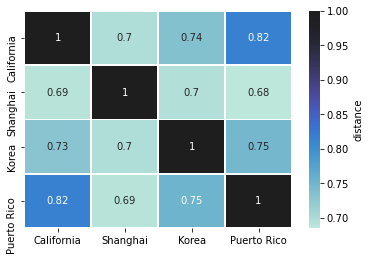

In [230]:
# Create a new data frame and hard code to normalize data for each coloumn
# Name the columns the four strains 
df = pd.DataFrame({'California': [1701/1701, 1176/1701, 1243/1701, 1388/1701], 
                   'Shanghai': [1176/1683, 1683/1683, 1175/1683, 1165/1683], 
                   'Korea': [1243/1689, 1175/1689, 1689/1689, 1271/1689],
                  'Puerto Rico': [1388/1701, 1165/1701, 1271/1701, 1701/1701]})
# to label the rows
df.index = ['California', 'Shanghai', 'Korea', 'Puerto Rico']
df

# to create heatmap using seaborn
# annotations for each grid true to show values
# line widths to have space between each grid
# center color gradient key to California, California 
# Label the colorbar 'distance'
ax = sns.heatmap(df, annot=True, linewidths=.5, center=df.loc['California', 'California'], 
                 cbar_kws={'label': 'distance'})

### Part 4: Analysis of the results

The heatmap above shows the normalized pairwise sequence alignments for the four strains for influenza A hemaglutinin. The heat map is scaled to have a dark blue represent a distance of 1 meaning that there is a perfect match bewteen sequences, and to have a light blue represent a smaller value which signifies that the sequences are distant from one another. 

Since Shanghai's influenza A hemagglutinin genome is the most distant from the California strain's, then using the WHO's prediction model, the Shanghai strain would be the most likely flu strain in North America next year. The Shanghai and California strain have a normalized alignment distance of 0.69, which is the lowest value on the heat map. This low normalized alignment score signfies that the California and Shanghai strain are most distant from one another. I can't really say if my hypothesis is correct or not because we are making a prediction for a future flu strain frequency in California. However, this is a simplified version of how the WHO would predict the next flu strain and thus prepare making the influenza vaccines for the next year. 